In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [236]:
def get_array_with_complex_julia(df_test):
    tes = df_test.to_numpy()
    for i in range(len(tes)):
        for j in range(len(tes[0])):
            if type(tes[i][j]) == str:
                tes[i][j] = tes[i][j].replace("im", "j")
                tes[i][j] = complex(tes[i][j].replace(" ", ""))
    return tes

def double_index_to_vertically_stacked_index(i, j, N):
    h_length  = N
    v_length  = N
    A = np.zeros(v_length, h_length)
    a = 1
    for i in range(h_length):
        for j in range(v_length):
            A[i,j] = a
            a += 1
    
    return int(A[i, j])

def vertically_stacked_to_double_index(index, N):
    h_length  = N
    v_length  = N
    A = np.zeros([v_length, h_length])
    a = 0
    for j in range(h_length):
        for i in range(v_length):
            if index == a:
                return (i, j)
            A[i,j] = a
            a += 1

def full_beta_to_beta_single_double_index(beta, N):
    beta_i = np.zeros([N], dtype = "object")
    beta_ij = np.zeros([N, N], dtype = "object")
                                          
    for i in range(N):
        beta_i[i] = beta[:,i]
        
    for i in range(N, len(beta[0])):
        l, m = vertically_stacked_to_double_index(i-N, N)
        beta_ij[l][m] = beta[:,i]
    return beta_i, beta_ij

In [237]:
df_time_julia = pd.read_csv("time_test.csv", header = None)
time = get_array_with_complex_julia(df_time_julia)

df_beta_julia = pd.read_csv("beta_full_test.csv", header = None)
beta_julia = get_array_with_complex_julia(df_beta_julia)

In [238]:
N = 2
beta_i, beta_ij = full_beta_to_beta_single_double_index(beta_julia, N)

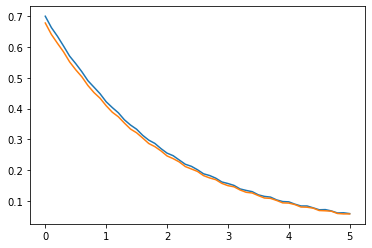

In [240]:
for i in range(N):
    plt.plot(time, np.abs(beta_julia[:,i]))

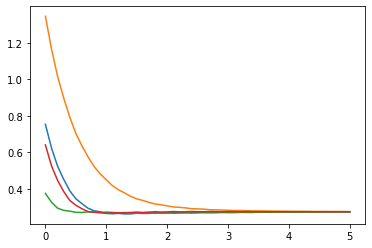

In [241]:
for i in range(N, len(beta_julia[0])):
    plt.plot(time, np.abs(beta_julia[:,i]))